In [1]:
#This notebook is used to create Figure 17 in Reichl et al. 
# as submitted to ESS

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import gsw as gsw
import matplotlib as mpl
from glob import glob

In [2]:
#Requires running notebook Buoy_Model_PDF_Comparison_Figures
Model = xr.open_dataset('../Data/MOM6Buoy_Outputs.nc')

/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh((X),Zm,np.log10(A),
/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh((X),Zm,np.log10(A),
/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh((X),Zm,np.log10(A),
/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh((X),Zm,np.log10(A),
/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh((X),Zm,np.log10(A),
/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh((X),Zm,np.log10(A),
/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered in log10
  c=ax.pcolormesh((X),Zm,np.log10(A),
/tmp/ipykernel_3716092/3866622820.py:29: RuntimeWarning: divide by zero encountered

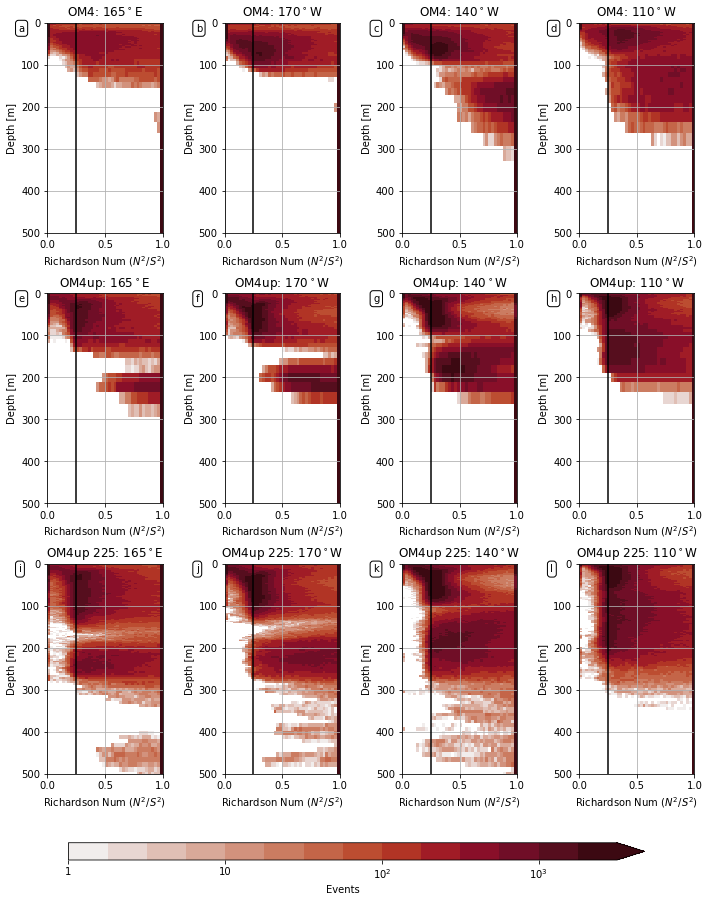

In [3]:
fig,AX=plt.subplots(3,4,figsize=(10,12))
cmap=cmocean.cm.amp
levels=np.linspace(0,3.5,15)
stnd_bins = np.linspace(0,1,41)

for i,Lon in enumerate(['165e','170w','140w','110w']):
    Lat='0n'
        
    for ip,LBL in enumerate(['OM4','OM4up','OM4up 225']):

        Um=Model['U_'+LBL+'_'+Lon]
        Sx=Model['Sx_'+LBL+'_'+Lon]
        N2=Model['N2_'+LBL+'_'+Lon]
        Zm=Model['Z_'+LBL+'_'+Lon]
        CT = Model['Time_'+LBL+'_'+Lon]

        A = np.zeros([Zm.size,len(stnd_bins)-1])
        for zi in range(Zm.size):
            u=np.minimum(1,np.maximum(N2[:,zi],1.e-10)/np.maximum(Sx[:,zi],1.e-16))
            A[zi,:] = np.histogram(u,stnd_bins)[0]
        DENm = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T
        Zm = Zm.values

        X = 0.5*(stnd_bins[1:]+stnd_bins[:-1])

        ax=AX.ravel()[i+ip*4]


        c=ax.pcolormesh((X),Zm,np.log10(A),
                      cmap=cmap,
                      norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                       )
        ax.set_ylim(500,0)
        ax.grid(True)
        ax.set_ylabel('Depth [m]')
        #axt.set_xticklabels('')
        ax.set_xlabel('Richardson Num ($N^2/S^2$)')
        ax.axvline(x=0.25,color='k')
        ax.set_title(LBL+': '+Lon[:-1]+'$^\circ$'+Lon[-1].upper())
    
    
fig.tight_layout()
fig.subplots_adjust(bottom=0.1)
axcb=fig.add_axes([0.1,0.00,0.8,0.02])
cb=plt.colorbar(c,cax=axcb,orientation='horizontal',extend='max')
cb.set_ticks([0,1,2,3])
cb.set_ticklabels(['1','10','10$^2$','10$^3$',])
cb.set_label('Events')

for AXi in range(0,12):
    txt='abcdefghijklmnopqrstuvwyxz'[AXi]
    AX.ravel()[AXi].text(-0.25,20,txt,bbox=dict(boxstyle='round', facecolor='white'))

fig.savefig('../Fig/RichardsonNumber_Occurences.png',dpi=200,bbox_inches = "tight")
        
